In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/maikol/Library/CloudStorage/Dropbox/home/documents/2024/2024_01_taller_100_paginas_ml':
  os.chdir(r'/Users/maikol/Library/CloudStorage/Dropbox/home/documents/2024/2024_01_taller_100_paginas_ml')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/4d/qj4qr8zx1n36td0hlt0p7x_h0000gn/T/ipykernel_21775/468825776.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/_bootstrap_external.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/zipimport.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/codecs.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/aliases.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/__init__.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/lib/python3.11/encodings/utf_8.py": 1701713411.0, "/usr/local/Cellar/python@3.11/3.11.7/Frameworks/Python.framework/Versions/3.11/

In [2]:
import numpy as np

rng = np.random.RandomState(0)
data = np.linspace(0, 30, num=1_000).reshape(-1, 1)
target = np.sin(data).ravel()

In [3]:
training_sample_indices = rng.choice(np.arange(0, 400), size=40, replace=False)
training_data = data[training_sample_indices]
training_noisy_target = target[training_sample_indices] + 0.5 * rng.randn(
    len(training_sample_indices)
)

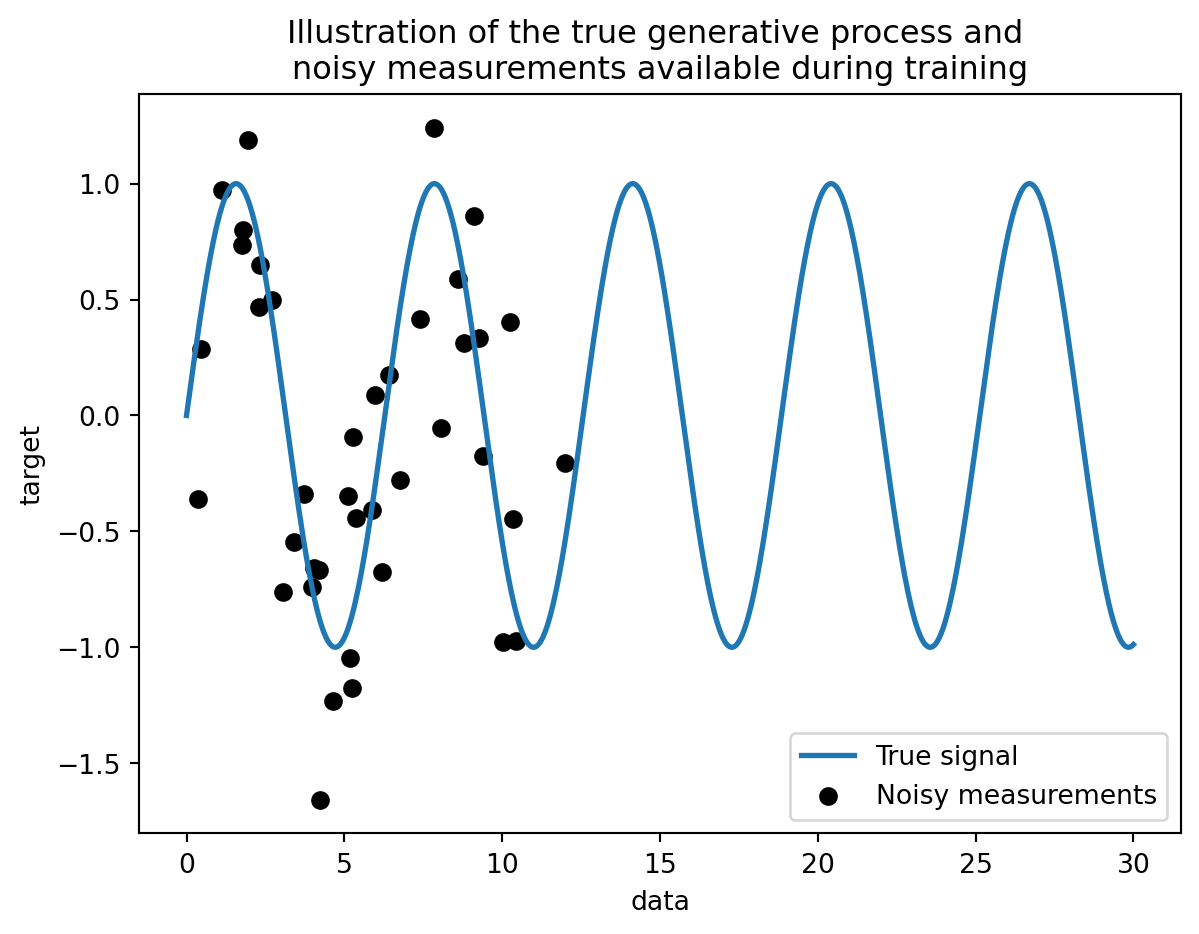

In [4]:
import matplotlib.pyplot as plt

plt.plot(data, target, label="True signal", linewidth=2)
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
plt.legend()
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title(
    "Illustration of the true generative process and \n"
    "noisy measurements available during training"
)

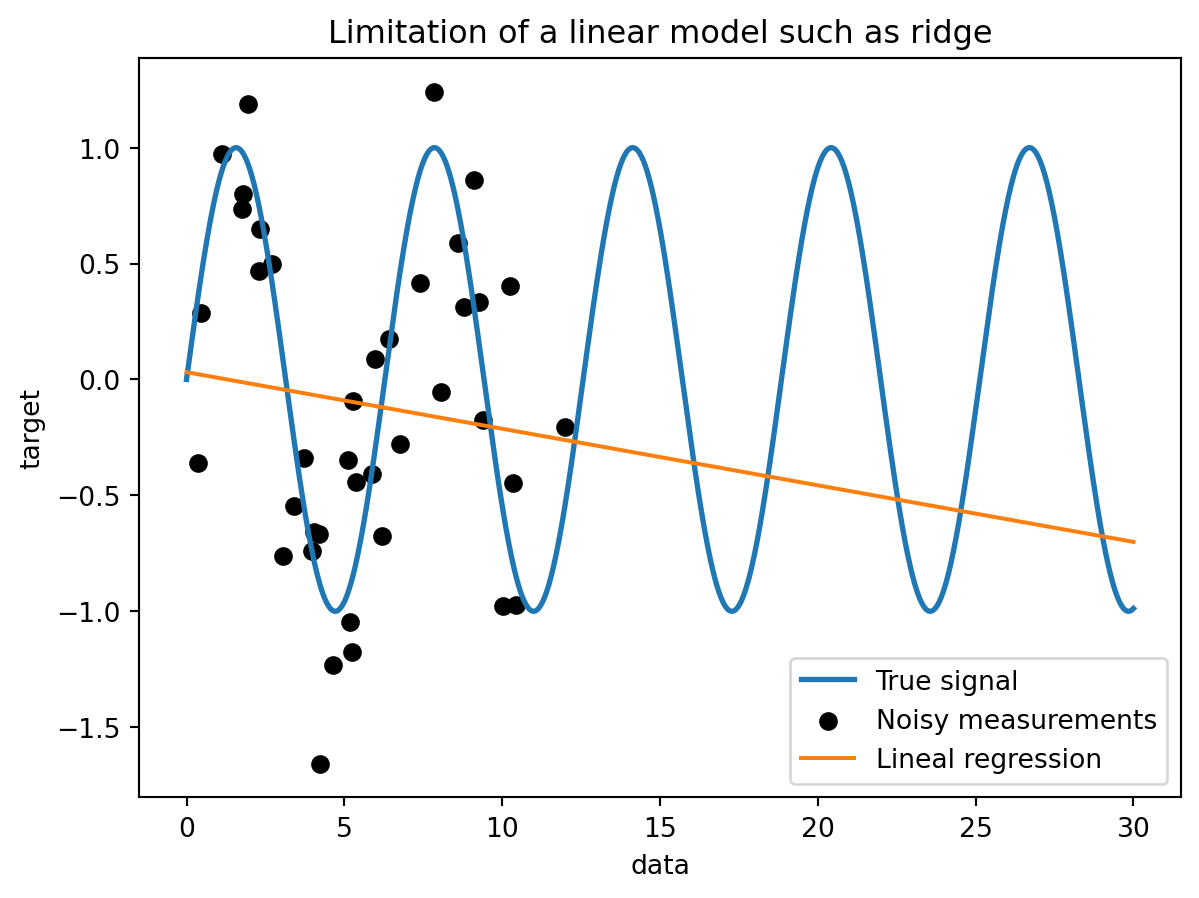

In [5]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(training_data, training_noisy_target)

plt.plot(data, target, label="True signal", linewidth=2)
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
plt.plot(data, ridge.predict(data), label="Lineal regression")
plt.legend()
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title("Limitation of a linear model such as ridge")

Fitting KernelRidge with default kernel: 0.002 seconds


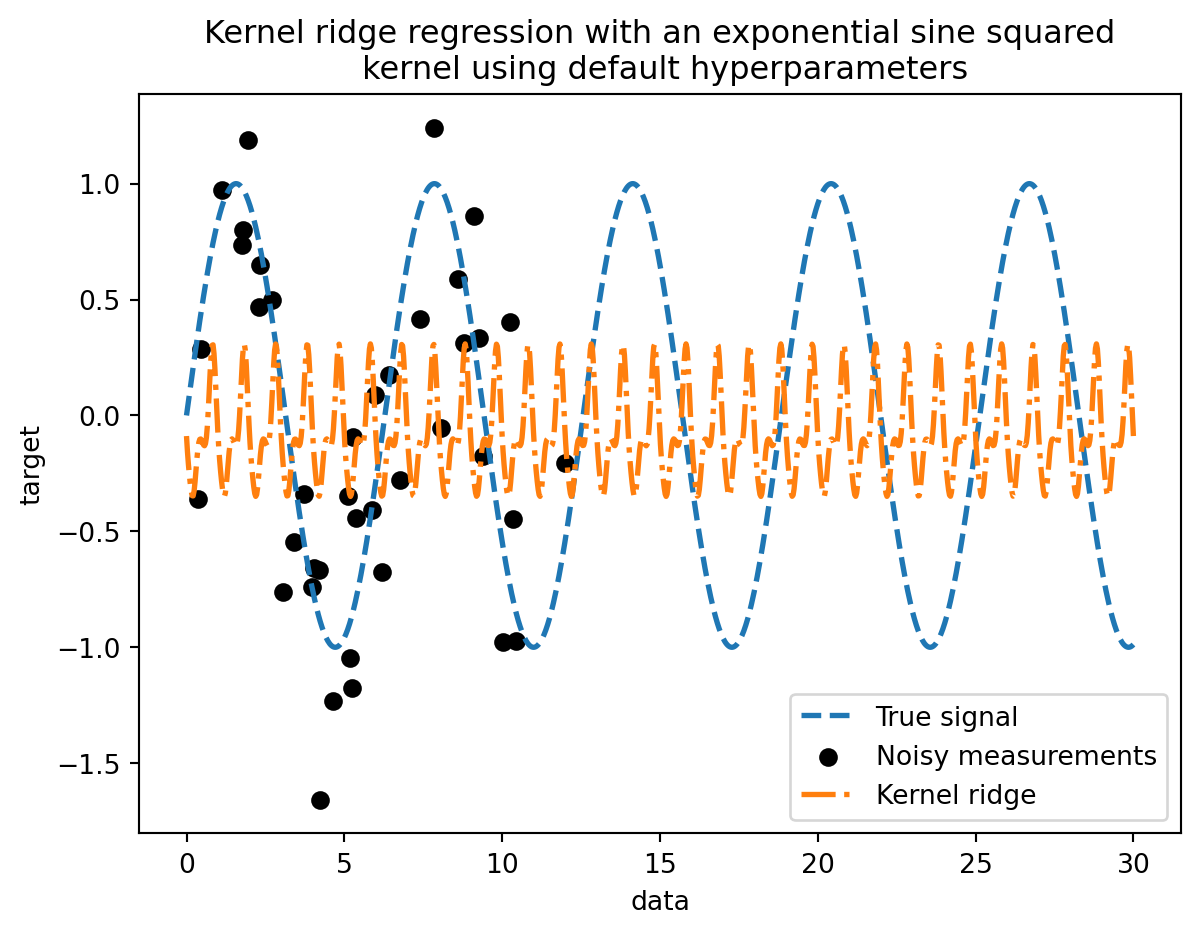

In [6]:
import time

from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.kernel_ridge import KernelRidge

kernel_ridge = KernelRidge(kernel=ExpSineSquared())

start_time = time.time()
kernel_ridge.fit(training_data, training_noisy_target)
print(
    f"Fitting KernelRidge with default kernel: {time.time() - start_time:.3f} seconds"
)

plt.plot(data, target, label="True signal", linewidth=2, linestyle="dashed")
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
plt.plot(
    data,
    kernel_ridge.predict(data),
    label="Kernel ridge",
    linewidth=2,
    linestyle="dashdot",
)
plt.legend(loc="lower right")
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title(
    "Kernel ridge regression with an exponential sine squared\n "
    "kernel using default hyperparameters"
)

In [7]:
kernel_ridge.kernel

ExpSineSquared(length_scale=1, periodicity=1)

In [8]:
from scipy.stats import loguniform

from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "alpha": loguniform(1e0, 1e3),
    "kernel__length_scale": loguniform(1e-2, 1e2),
    "kernel__periodicity": loguniform(1e0, 1e1),
}
kernel_ridge_tuned = RandomizedSearchCV(
    kernel_ridge,
    param_distributions=param_distributions,
    n_iter=500,
    random_state=0,
)
start_time = time.time()
kernel_ridge_tuned.fit(training_data, training_noisy_target)
print(f"Time for KernelRidge fitting: {time.time() - start_time:.3f} seconds")

Time for KernelRidge fitting: 4.115 seconds


In [9]:
kernel_ridge_tuned.best_params_

{'alpha': 1.991584977345022,
 'kernel__length_scale': 0.7986499491396734,
 'kernel__periodicity': 6.6072758064261095}

Time for KernelRidge predict: 0.002 seconds


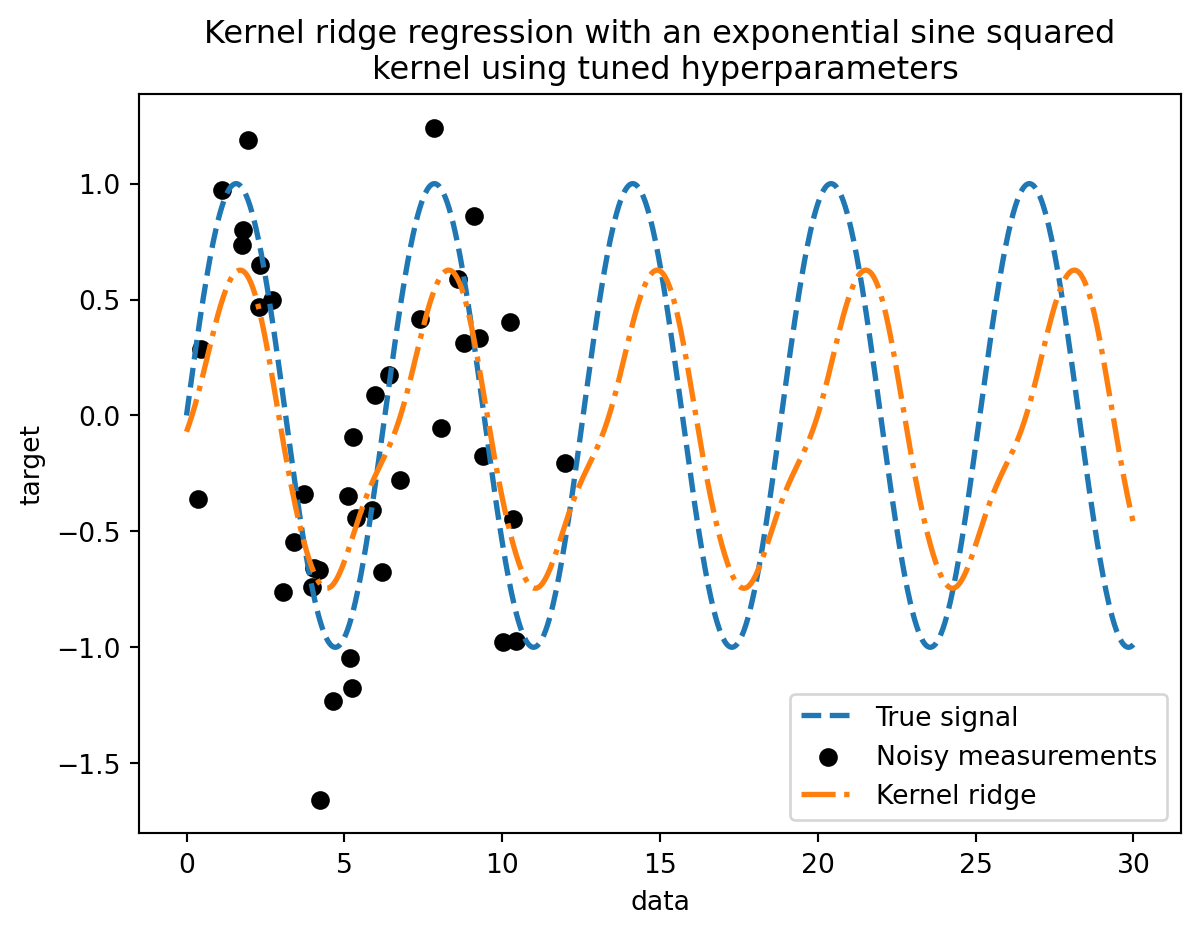

In [10]:
start_time = time.time()
predictions_kr = kernel_ridge_tuned.predict(data)
print(f"Time for KernelRidge predict: {time.time() - start_time:.3f} seconds")

plt.plot(data, target, label="True signal", linewidth=2, linestyle="dashed")
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
plt.plot(
    data,
    predictions_kr,
    label="Kernel ridge",
    linewidth=2,
    linestyle="dashdot",
)
plt.legend(loc="lower right")
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title(
    "Kernel ridge regression with an exponential sine squared\n "
    "kernel using tuned hyperparameters"
)

In [11]:
y = ["manzana", "pera", "naranja"]

In [12]:
import pandas as pd
import seaborn as sns

import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification

import time

In [13]:
# Generando un array aleatorio de 1000 muestras, 10 features y una etiqueta de y=[0,1,2]
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)

# Separando el array en conjuntos de prueba (25 %) y entrenamiento (75 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Colocando en dataframes para facilidad de presentación y graficación
df_train = pd.DataFrame({"y":y_train, "x0":X_train[:,0], "x1":X_train[:,1], "x2":X_train[:,2], "x3":X_train[:,3], "x4":X_train[:,4], "x5":X_train[:,5], "x6":X_train[:,6], "x7":X_train[:,7], "x8":X_train[:,8], "x9":X_train[:,9]})

df_test = pd.DataFrame({"y":y_test, "x0":X_test[:,0], "x1":X_test[:,1], "x2":X_test[:,2], "x3":X_test[:,3], "x4":X_test[:,4], "x5":X_test[:,5], "x6":X_test[:,6], "x7":X_test[:,7], "x8":X_test[:,8], "x9":X_test[:,9]})

df_train

,y,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9
0,2,-0.730468,0.397713,2.074811,3.268605,2.406136,-1.596750,-1.097254,0.839374,0.296566,-0.135522
1,2,3.365775,-1.418898,1.872383,-0.693364,-3.133404,-2.877166,0.404063,-1.955554,-1.324028,1.988373
2,2,-3.921299,0.641428,-2.026409,-2.679728,2.478175,4.280245,0.959757,-1.031408,2.619929,-1.552321
3,2,-0.476039,-0.361355,0.966933,2.514187,3.982157,-1.931150,-0.354184,2.025803,-0.295005,-2.314401
4,0,-0.119220,-0.421085,0.706323,0.561597,-0.483120,0.058308,-0.852335,-0.952946,-0.161098,0.587163
...,...,...,...,...,...,...,...,...,...,...,...
745,2,-0.707565,-4.271104,1.374571,-0.328230,6.264860,-2.072022,0.239431,-1.271852,-0.637552,-5.091475
746,1,-0.514813,-0.473396,-2.421689,-1.699244,-0.952055,2.352776,-0.218440,0.078120,-0.600584,-0.977306
747,0,2.273762,1.123171,0.927239,2.014521,-1.140324,-2.785479,0.158036,2.155000,-0.954108,1.196839
748,0,5.365061,-7.979364,3.641793,0.967290,3.271363,-8.028106,-0.642597,-1.656500,-5.257335,-4.871621


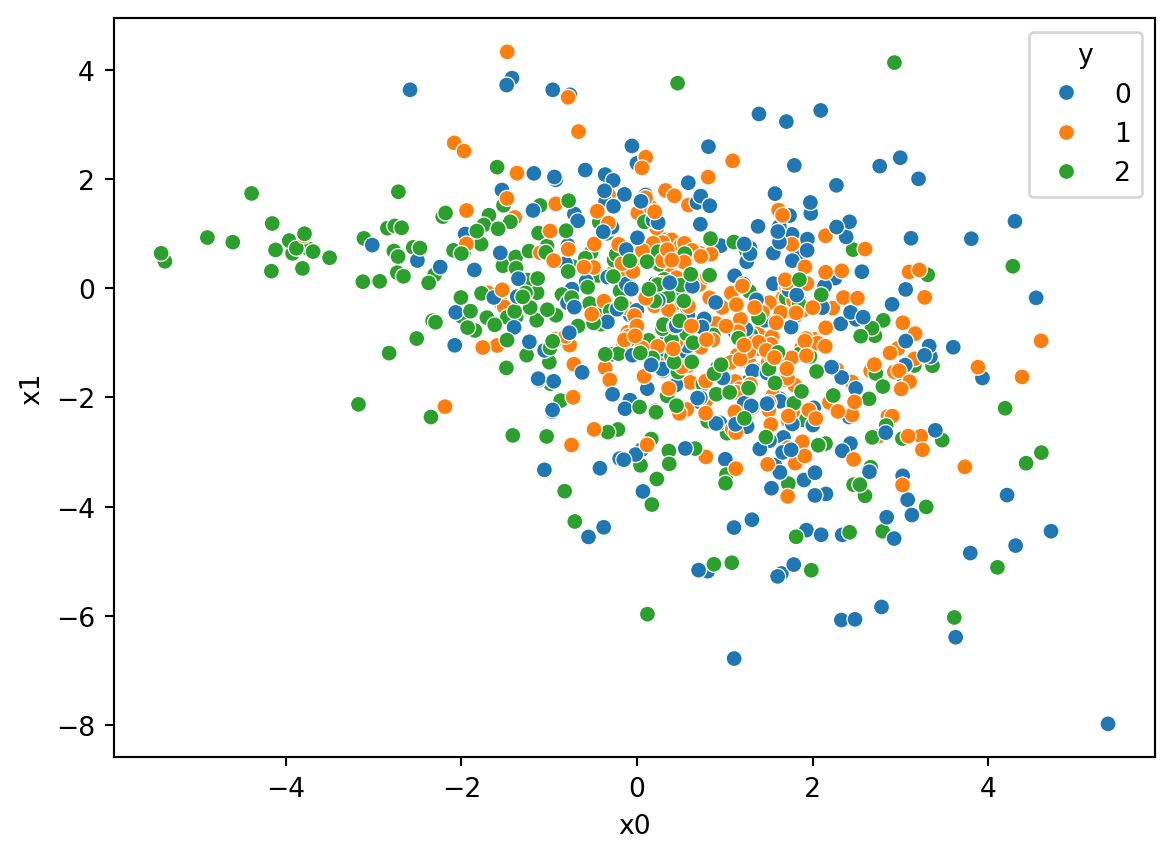

In [14]:
ax = sns.scatterplot(data=df_train, x="x0", y="x1", hue="y", palette="tab10")

In [15]:
# Se define el modelo a usar dentro del OVR, en este caso SVC, puede ser logistico u otro
modelo = SVC()
# Entrenando el modelo con los datos de entrenamiento
clasificador = OneVsRestClassifier(modelo).fit(X_train, y_train)

In [16]:
# Probando el modelo con los datos de prueba
prediccion = clasificador.predict(X_test)

# Colocando los datos predichos en un dataframe
df_pred = pd.DataFrame({"y":prediccion, "x0":X_test[:,0], "x1":X_test[:,1], "x2":X_test[:,2], "x3":X_test[:,3], "x4":X_test[:,4], "x5":X_test[:,5], "x6":X_test[:,6], "x7":X_test[:,7], "x8":X_test[:,8], "x9":X_test[:,9]})

In [17]:
print(prediccion)

[2 0 2 2 0 0 0 1 0 2 2 2 2 0 1 2 1 0 0 0 1 2 2 2 2 1 0 1 0 0 1 0 1 2 0 1 1
 0 1 2 0 1 0 2 2 0 0 0 2 2 1 1 1 0 2 2 1 0 2 0 0 0 0 2 2 1 1 2 2 1 1 1 2 0
 0 0 1 0 0 2 1 2 0 1 1 0 1 0 2 2 0 2 1 2 2 0 2 2 1 0 1 2 1 2 2 0 2 1 1 0 2
 0 0 0 2 2 2 2 0 2 0 0 1 2 2 2 0 1 0 0 0 2 0 0 0 0 1 0 1 2 0 1 0 1 2 2 1 2
 1 0 2 2 1 1 2 1 1 0 1 2 2 0 2 0 0 1 0 0 1 0 1 0 1 0 2 1 2 0 0 0 0 1 0 1 0
 2 0 2 2 0 0 1 0 2 0 0 1 2 0 2 0 1 2 2 1 2 1 2 2 2 2 0 1 1 2 2 1 0 2 0 2 2
 0 0 1 0 0 0 1 0 1 1 1 0 2 1 0 0 0 0 1 2 1 1 1 0 0 1 1 2]


In [18]:
print("mean accuracy = ",clasificador.score(X_test, y_test))

mean accuracy =  0.908


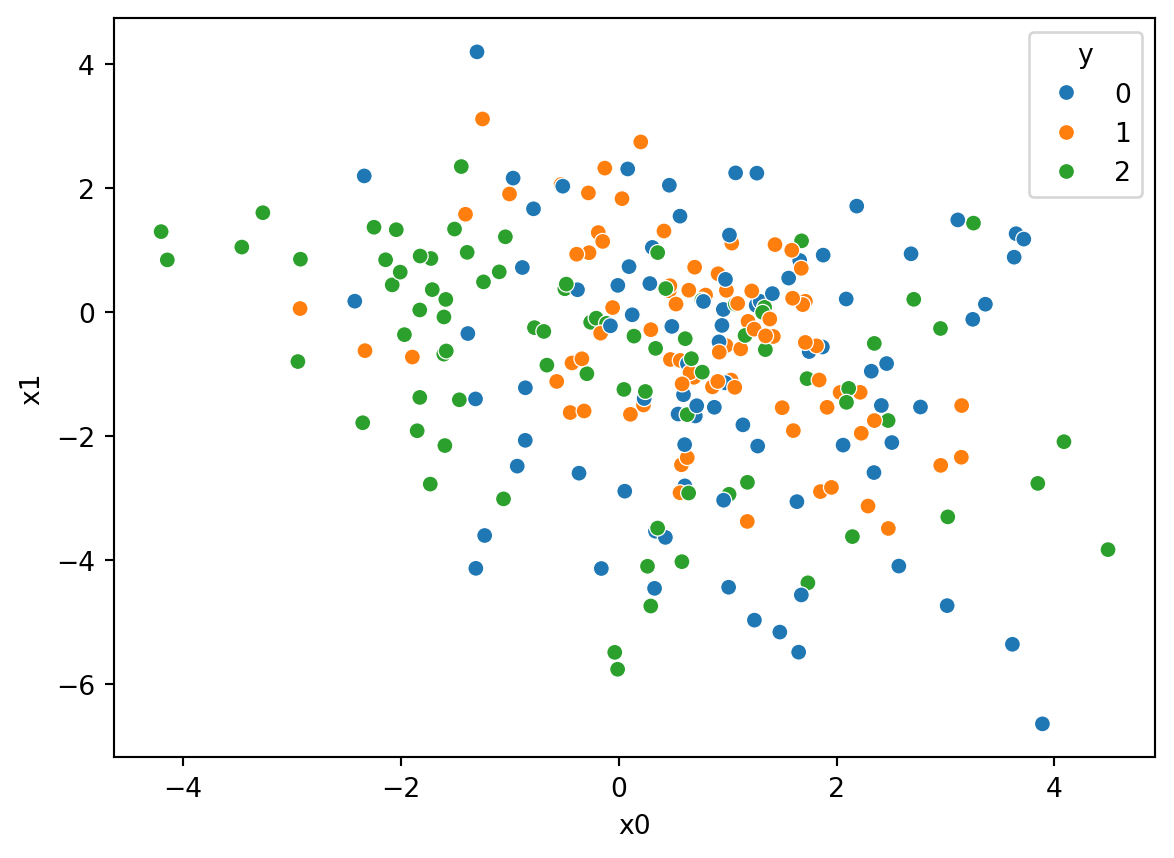

In [19]:
ax2 = sns.scatterplot(data=df_test, x="x0", y="x1", hue="y", palette="tab10")

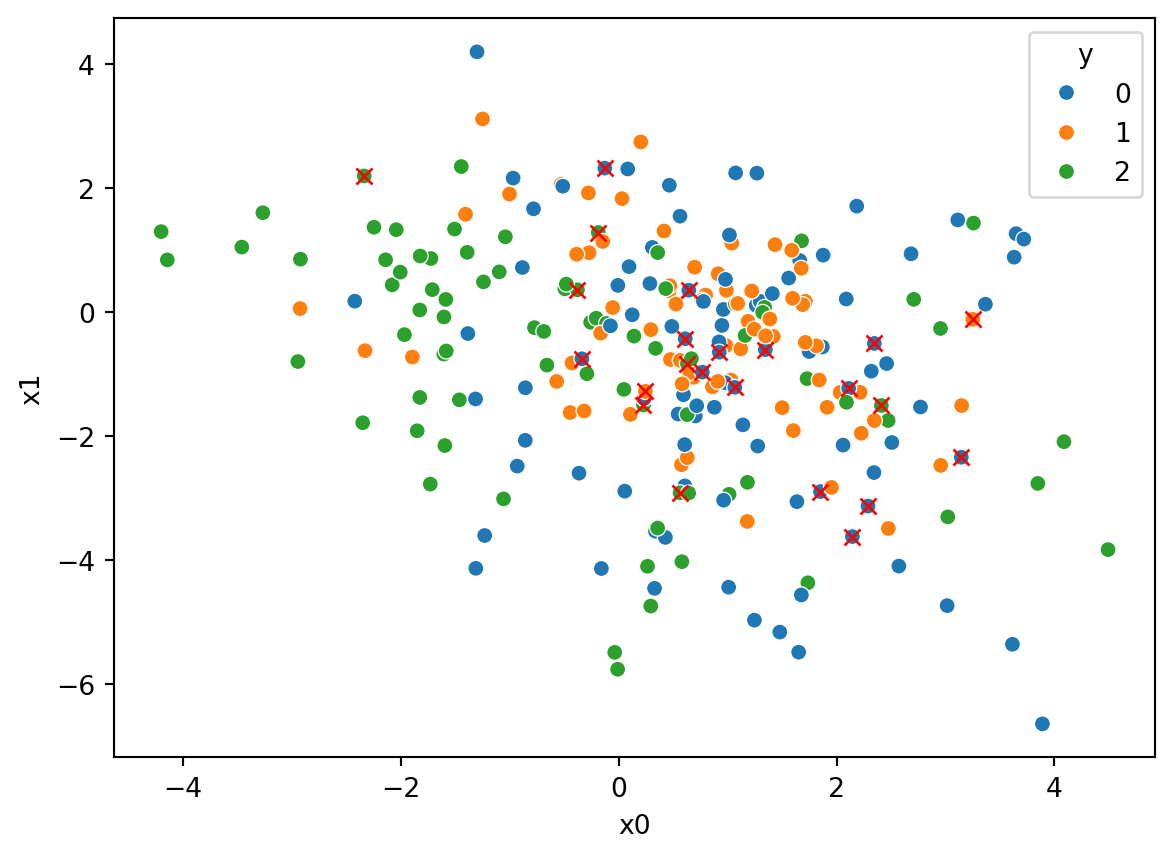

In [20]:
ax2 = sns.scatterplot(data=df_pred, x="x0", y="x1", hue="y", palette="tab10")
# Compara los y de prueba vs. los y predichos para marcar los que no se clasificaron correctamente
for i in range(len(prediccion)):
    if prediccion[i] != y_test[i]:
        ax2.plot(df_pred["x0"].iloc[i], df_pred["x1"].iloc[i], "rx")

Counter({0: 9990, 1: 10})


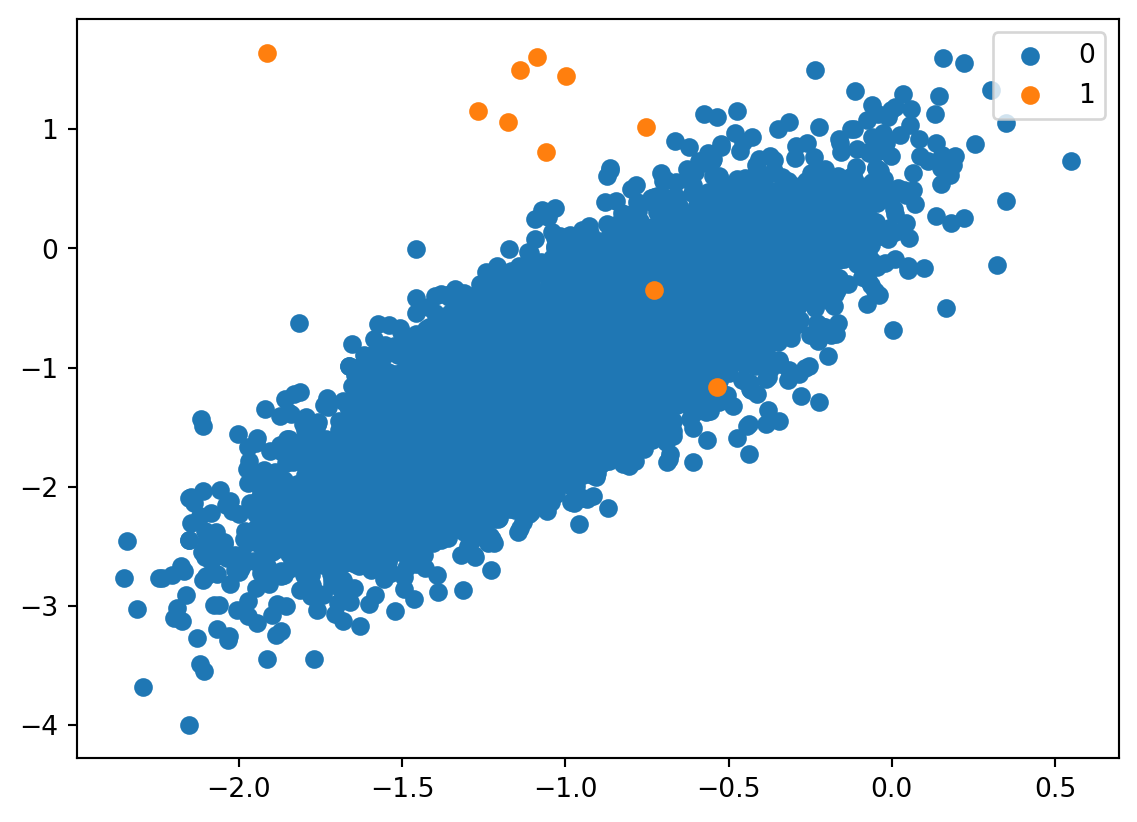

In [21]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
 n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.123


In [23]:
import numpy as np
y = np.array([[1, 0, 0, 1], [0, 0, 1, 1], [0, 0, 0, 0]])
print(y)

[[1 0 0 1]
 [0 0 1 1]
 [0 0 0 0]]


In [24]:
import numpy as np
import scipy.sparse as sparse

y = np.array([[1, 0, 0, 1], [0, 0, 1, 1], [0, 0, 0, 0]])
y_sparse = sparse.csr_matrix(y)
print(y_sparse)

  (0, 0)	1
  (0, 3)	1
  (1, 2)	1
  (1, 3)	1


In [25]:
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, hamming_loss

# Generate synthetic multi-label dataset
X, y = make_multilabel_classification(n_samples=100, n_features=10, n_classes=5, random_state=42)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multi-label classifier
classifier = MultiOutputClassifier(KNeighborsClassifier())

# Train the classifier
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy and Hamming loss
accuracy = accuracy_score(y_test, y_pred)
hamming_loss = hamming_loss(y_test, y_pred)

print("Hamming Loss:", hamming_loss)

Hamming Loss: 0.21
